In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schools

In [2]:
##
# load the school "ELA  test" data from the open api server
# load the school "MATH test" data from the open api server
# load the school "   demo  " data from the open api server

math_df = schools.load_math_tests()    #math_df.head()
ela_df = schools.load_ela_tests()      #ela_df.head()
demo_df = schools.load_demographics()  #demo_df.head()

## combine the above dataframes
math_demo_df = schools.combine_test_data(demo_df, math_df, "math") #math_demo_df.head()
ela_demo_df  = schools.combine_test_data(demo_df, ela_df, "ela")   #ela_demo_df.head()

In [13]:
math_demo_df#["math_asian_grade_3_level_1"]
#df = ELA_df[(ELA_df.grade == g) & (ELA_df.year == y) & (ELA_df.category ==cat[k])]

,dbn,school_name,year,total_enrollment,grade_3k_pk_half_day_full,grade_k,grade_1,grade_2,grade_3,grade_4,...,math_never_ell_grade_8_level_1,math_never_ell_grade_8_level_1_1,math_never_ell_grade_8_level_2,math_never_ell_grade_8_level_2_1,math_never_ell_grade_8_level_3,math_never_ell_grade_8_level_3_1,math_never_ell_grade_8_level_4,math_never_ell_grade_8_level_4_1,math_never_ell_grade_8_level_3_4,math_never_ell_grade_8_level_3_4_1
0,01M015,P.S. 015 Roberto Clemente,2015,176,14,32,33,39,23,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M015,P.S. 015 Roberto Clemente,2016,178,17,28,33,27,31,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M015,P.S. 015 Roberto Clemente,2017,190,17,28,32,33,23,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M015,P.S. 015 Roberto Clemente,2018,174,13,20,33,30,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M015,P.S. 015 Roberto Clemente,2019,190,14,29,28,38,33,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01M019,P.S. 019 Asher Levy,2015,270,21,47,43,41,43,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01M019,P.S. 019 Asher Levy,2016,271,24,37,46,47,40,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01M019,P.S. 019 Asher Levy,2017,257,13,34,38,42,46,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01M019,P.S. 019 Asher Levy,2018,249,10,30,39,43,41,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01M019,P.S. 019 Asher Levy,2019,236,16,25,27,39,45,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# We make the histograms of grades as function of ethniticity...
# --------------------------------------------------------------
# To do that we first construct a dataframe with the grades for each ethnic
#  in columns
# 
ela_grades_ethnic = pd.DataFrame({})
math_grades_ethnic = pd.DataFrame({})

list_grades = [
    "grades_asian_2014", "grades_asian_2015", "grades_asian_2016", "grades_asian_2017", "grades_asian_2018",
    "grades_black_2014", "grades_black_2015", "grades_black_2016", "grades_black_2017", "grades_black_2018",    
    "grades_white_2014", "grades_white_2015", "grades_white_2016", "grades_white_2017", "grades_white_2018",
    "grades_hispanic_2014", "grades_hispanic_2015", "grades_hispanic_2016", "grades_hispanic_2017", "grades_hispanic_2018"
]

yr = [2014,2015,2016,2017,2018,
      2014,2015,2016,2017,2018,
      2014,2015,2016,2017,2018,
      2014,2015,2016,2017,2018]

ethnic = ['asian','asian','asian','asian','asian',
          'black','black','black','black','black',
          'white','white','white','white','white',
          'hispanic','hispanic','hispanic','hispanic','hispanic']

for i in range( 0, len(list_grades) ):
    ela_grades_ethnic[list_grades[i]] = ela_df[(ela_df.year == yr[i]) & (ela_df.category ==ethnic[i])].reset_index().grade 
    ela_grades_ethnic[list_grades[i]] = pd.to_numeric(ela_grades_ethnic[list_grades[i]], errors='coerce')
    math_grades_ethnic[list_grades[i]] = math_df[(math_df.year == yr[i]) & ((math_df.category ==ethnic[i]))].reset_index().grade
    math_grades_ethnic[list_grades[i]] = pd.to_numeric(math_grades_ethnic[list_grades[i]], errors='coerce')

# Then we make tables for each year for ela and math....
ela_grades_ethnic_2014 = ela_grades_ethnic[["grades_asian_2014","grades_black_2014",
                                            "grades_white_2014","grades_hispanic_2014"]]
ela_grades_ethnic_2015 = ela_grades_ethnic[["grades_asian_2015","grades_black_2015",
                                            "grades_white_2015","grades_hispanic_2015"]]
ela_grades_ethnic_2016 = ela_grades_ethnic[["grades_asian_2016","grades_black_2016",
                                            "grades_white_2016","grades_hispanic_2016"]]
ela_grades_ethnic_2017 = ela_grades_ethnic[["grades_asian_2017","grades_black_2017",
                                            "grades_white_2017","grades_hispanic_2017"]]
ela_grades_ethnic_2018 = ela_grades_ethnic[["grades_asian_2018","grades_black_2018",
                                            "grades_white_2018","grades_hispanic_2018"]]

In [197]:
ela_grades_ethnic_2014#["grades_hispanic_2014"] 
#float("NaN")

,grades_asian_2014,grades_black_2014,grades_white_2014,grades_hispanic_2014
0,3.0,3.0,3.0,3.0
1,4.0,4.0,4.0,4.0
2,5.0,5.0,5.0,5.0
3,NaN,NaN,NaN,NaN
4,3.0,3.0,3.0,3.0
5,4.0,4.0,5.0,4.0
6,5.0,5.0,NaN,5.0
7,NaN,NaN,3.0,NaN
8,3.0,3.0,4.0,3.0
9,4.0,4.0,5.0,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b33be3a90>,
      dtype=object)

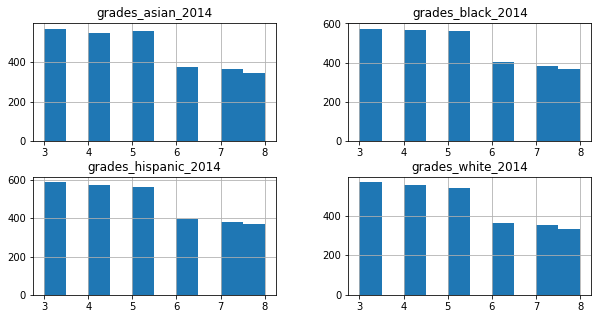

In [199]:
ela_grades_ethnic_2014.hist(stacked=True, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b33a42b70>,
      dtype=object)

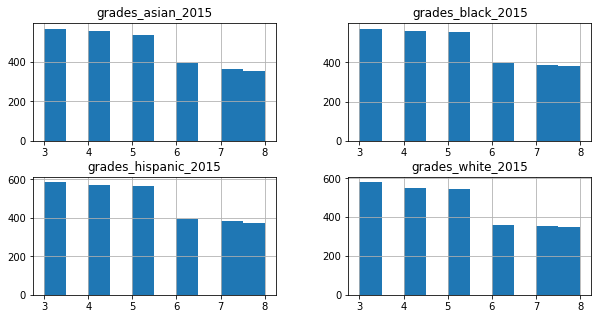

In [200]:
ela_grades_ethnic_2015.hist(figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b33a42978>,
      dtype=object)

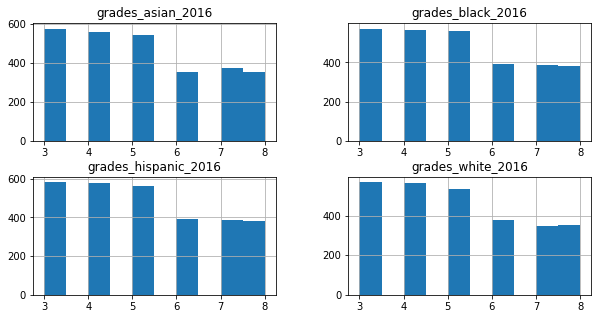

In [201]:
ela_grades_ethnic_2016.hist(figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b318def60>,
      dtype=object)

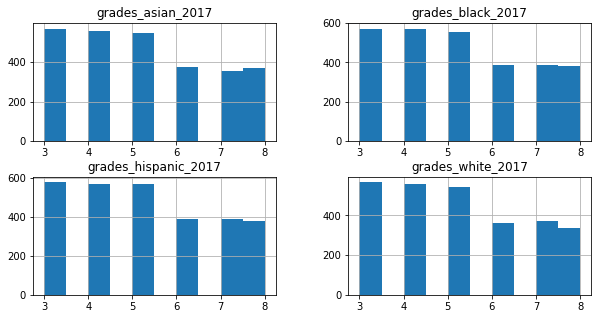

In [202]:
ela_grades_ethnic_2017.hist(figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b318de1d0>,
      dtype=object)

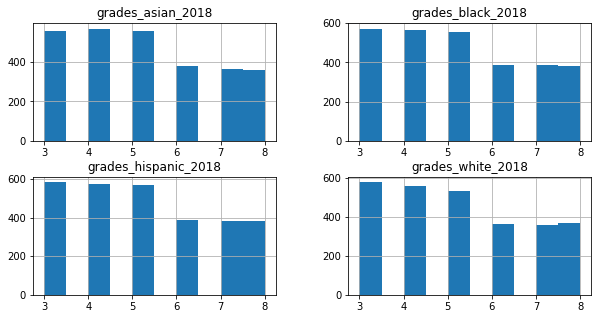

In [203]:
ela_grades_ethnic_2018.hist(figsize=(10,5))

In [185]:
#df = ela_df[(ela_df.category == 'black')]
#df
#
ela_grades_ethnic[list_grades[2]] = ela_df[(ela_df.year == yr[2]) & (ela_df.category ==ethnic[2])].grade
ela_grades_ethnic[list_grades[2]]
#ethnic[2]
#ela_grades_ethnic[list_grades[i]] = ela_df[(ela_df.year == yr[i]) & (ela_df.category ==ethnic[i])].grade 

84610     NaN
84615     NaN
84620     NaN
84625     NaN
84683     NaN
84689     NaN
84695     NaN
84701     NaN
84776     NaN
84782     NaN
84788     NaN
84794     NaN
84870     NaN
84875     NaN
84879     NaN
84890     NaN
84896     NaN
84902     NaN
85022     NaN
85025     NaN
85035     NaN
85108     NaN
85113     NaN
85119     NaN
85125     NaN
85202     NaN
85209     NaN
85215     NaN
85221     NaN
85299     NaN
         ... 
184958    NaN
184961    NaN
184965    NaN
184969    NaN
185034    NaN
185039    NaN
185043    NaN
185048    NaN
185184    NaN
185188    NaN
185199    NaN
185268    NaN
185271    NaN
185278    NaN
185543    NaN
185549    NaN
185555    NaN
185561    NaN
185567    NaN
185665    NaN
185668    NaN
185670    NaN
185678    NaN
185784    NaN
185790    NaN
185796    NaN
185802    NaN
185880    NaN
185883    NaN
185891    NaN
Name: grades_asian_2016, Length: 3737, dtype: object

In [193]:
ela_df[(ela_df.year == yr[2]) & (ela_df.category ==ethnic[2])].reset_index().grade


0         3
1         5
2       all
3         3
4         4
5         5
6       all
7         3
8         4
9         5
10      all
11        3
12        4
13        5
14        6
15        7
16        8
17      all
18        3
19        4
20        5
21      all
22        5
23        3
24        4
25        5
26      all
27        3
28        4
29        5
       ... 
3865      7
3866      8
3867    all
3868      6
3869      7
3870      8
3871    all
3872      7
3873    all
3874      3
3875    all
3876      4
3877      6
3878    all
3879      5
3880      6
3881      7
3882      8
3883    all
3884      4
3885      7
3886      8
3887    all
3888      6
3889      7
3890      8
3891    all
3892      7
3893      8
3894    all
Name: grade, Length: 3895, dtype: object